<a href="https://colab.research.google.com/github/PrietyGangopadhyay/diabetes-diagnosis-ml-project/blob/main/Diabetes_Diagnosis_ML_Project(2352192).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load data from the CSV file
dataset = pd.read_csv('/content/diabetes_data_upload.csv')
display(dataset.head())

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [68]:
csv_path = "/content/diabetes_data_upload.csv"
df = pd.read_csv(csv_path)

# check first few rows
print(df.head())
type(df)

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

pandas.core.frame.DataFrame

In [69]:
## import data from local directory
#file_path = r"C:\Users\YourName\Downloads\/content/diabetes_data_upload.csv.xlsx"
#df = pd.read_csv(file_path)

In [70]:
## import data from Excel csv sheet
#dftrain = pd.read_csv('disease Training.csv')
#dftest = pd.read_csv('disease Testing.csv')
df = pd.read_csv("/content/diabetes_data_upload.csv")


Data Description

In [71]:
#description of the dataset

# Shape of dataset (rows, columns)
print("Shape:", df.shape)


Shape: (520, 17)


In [72]:
# Column names
print("Columns:", df.columns)

Columns: Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [73]:
# Summary statistics
print(df.describe())

              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000


Data Preprocessing

In [74]:
# identify null values
dataset=df
null_columns = dataset.columns[dataset.isnull().any()]
dataset[null_columns].isnull().sum()

,0


In [75]:
# detect duplicated records
dataset[dataset.duplicated( keep = 'first')]


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


Data Visualization

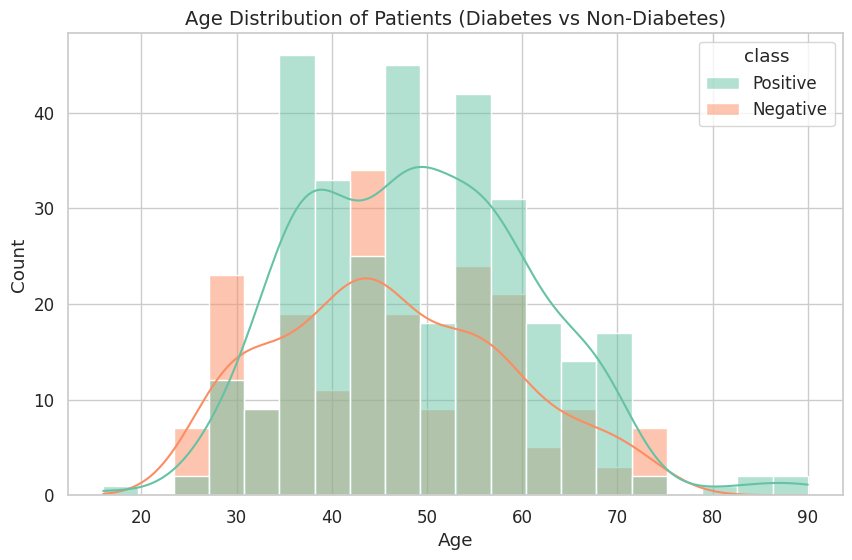

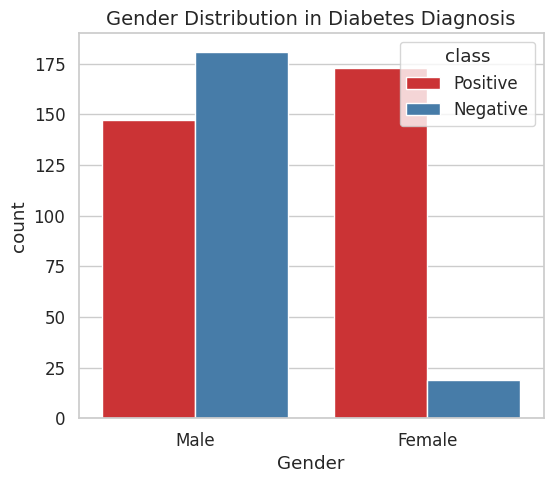

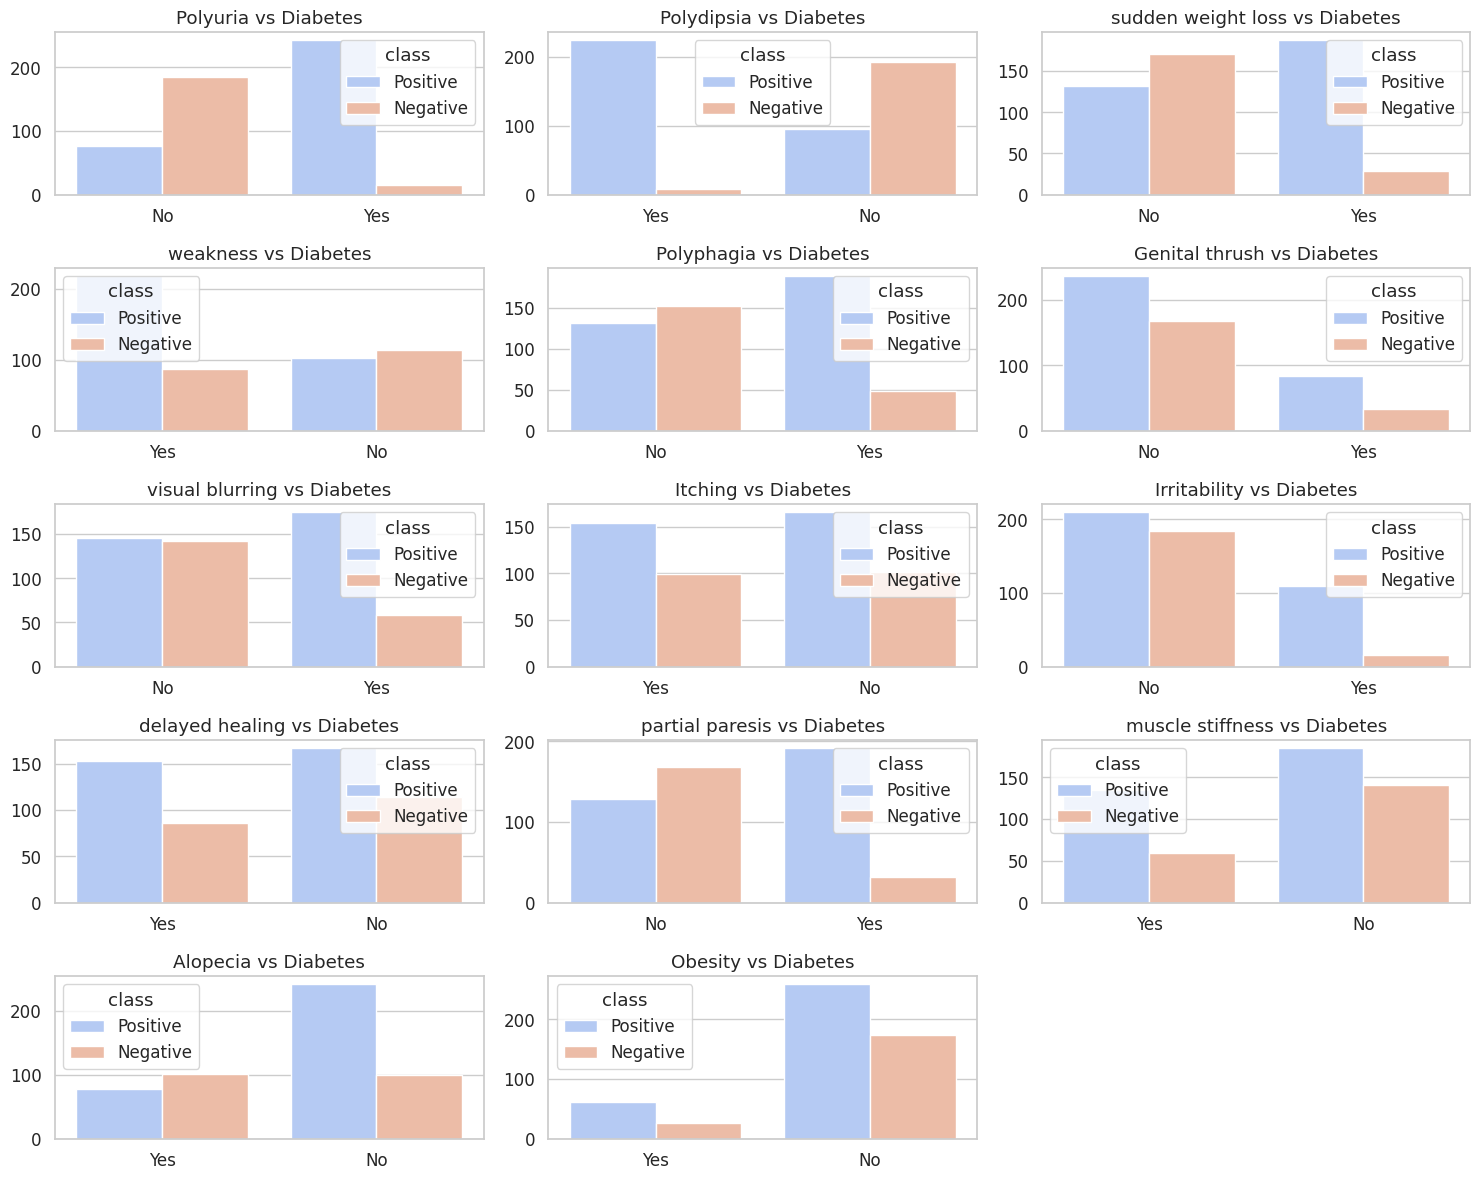

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset is already loaded as df
# Example: df = pd.read_csv("diabetes_data_upload.csv")

# 1. Histogram of Age distribution by diabetes class
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="class", bins=20, kde=True, palette="Set2")
plt.title("Age Distribution of Patients (Diabetes vs Non-Diabetes)", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2. Countplot of Gender vs Class
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Gender", hue="class", palette="Set1")
plt.title("Gender Distribution in Diabetes Diagnosis", fontsize=14)
plt.show()

# 3. Symptom frequency comparison (Yes/No vs Class)
symptoms = ["Polyuria","Polydipsia","sudden weight loss","weakness",
            "Polyphagia","Genital thrush","visual blurring","Itching",
            "Irritability","delayed healing","partial paresis",
            "muscle stiffness","Alopecia","Obesity"]

plt.figure(figsize=(15,12))
for i, symptom in enumerate(symptoms, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=symptom, hue="class", palette="coolwarm")
    plt.title(f"{symptom} vs Diabetes")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()

/tmp/ipython-input-841256338.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({


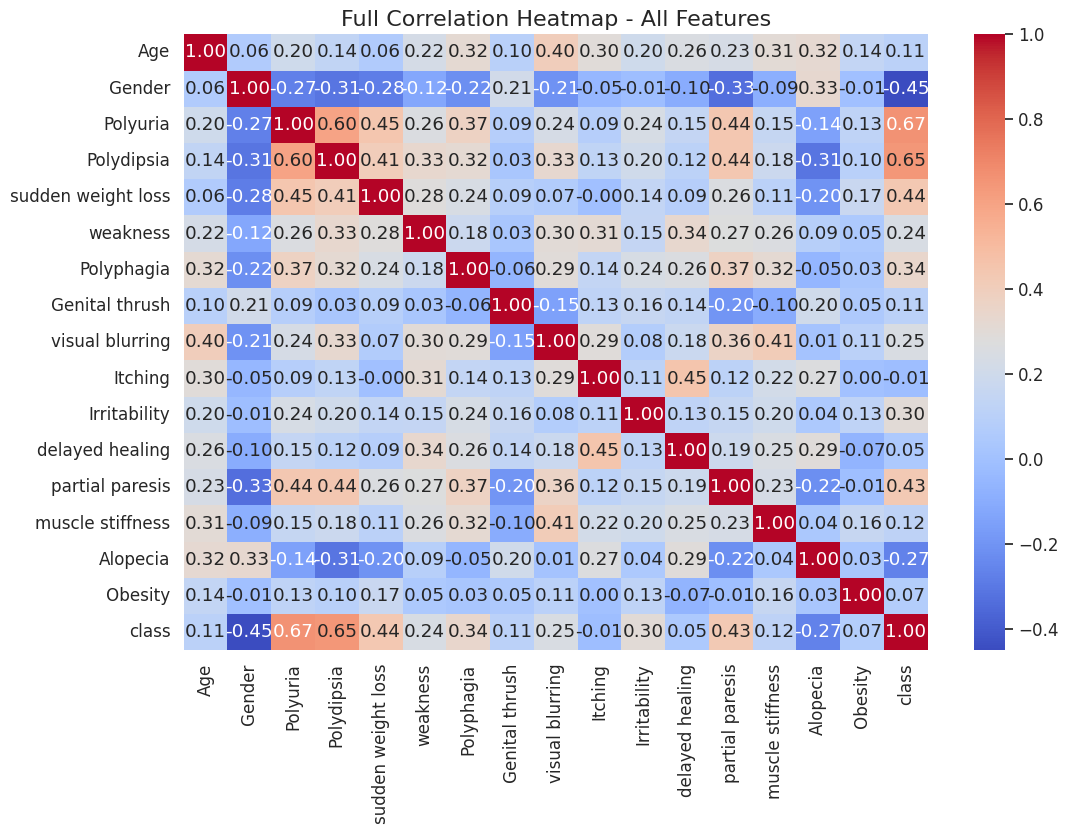

In [77]:
# Encode categorical values for correlation
df_encoded = df.copy()
df_encoded = df_encoded.replace({
    "Yes": 1, "No": 0,
    "Positive": 1, "Negative": 0,
    "Male": 1, "Female": 0
})

# Correlation matrix (all columns)
corr_full = df_encoded.corr()

# Plot full heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_full, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Full Correlation Heatmap - All Features", fontsize=16)
plt.show()

Heatmap after Dropping columns:

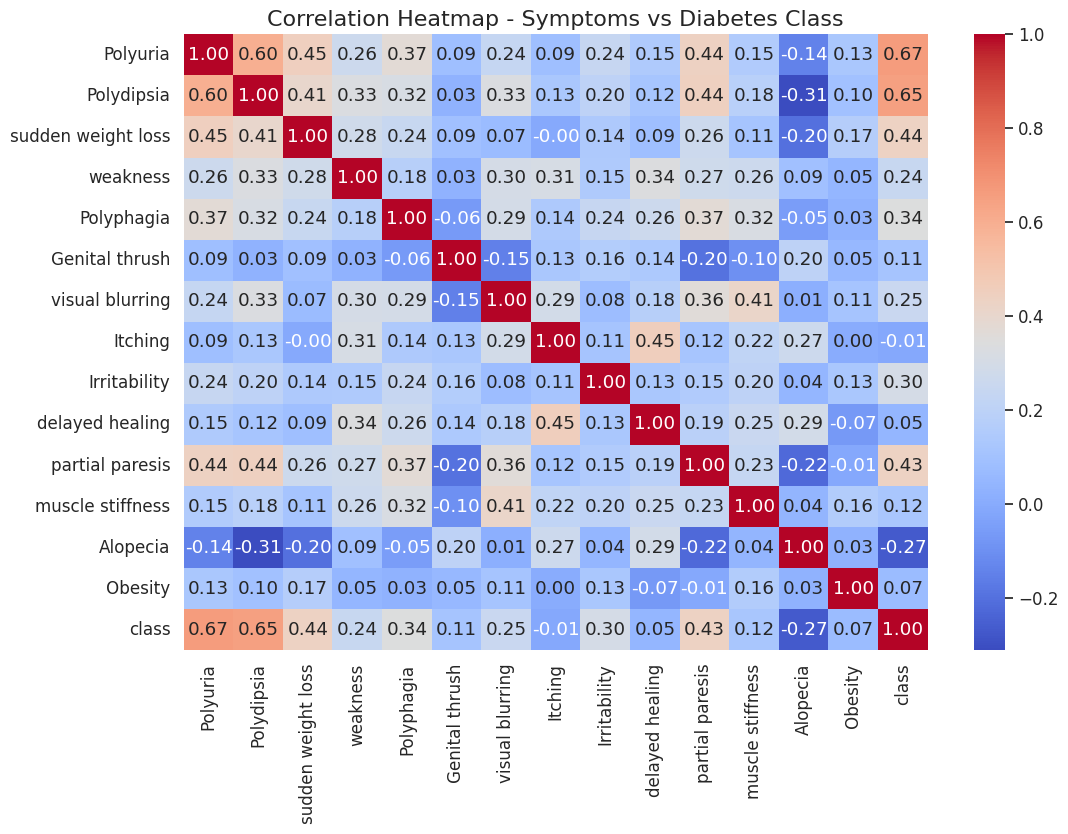

In [78]:
# Select only symptom columns + class
symptoms = ["Polyuria","Polydipsia","sudden weight loss","weakness",
            "Polyphagia","Genital thrush","visual blurring","Itching",
            "Irritability","delayed healing","partial paresis",
            "muscle stiffness","Alopecia","Obesity","class"]

corr_symptoms = df_encoded[symptoms].corr()

# Plot focused heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_symptoms, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Symptoms vs Diabetes Class", fontsize=16)
plt.show()

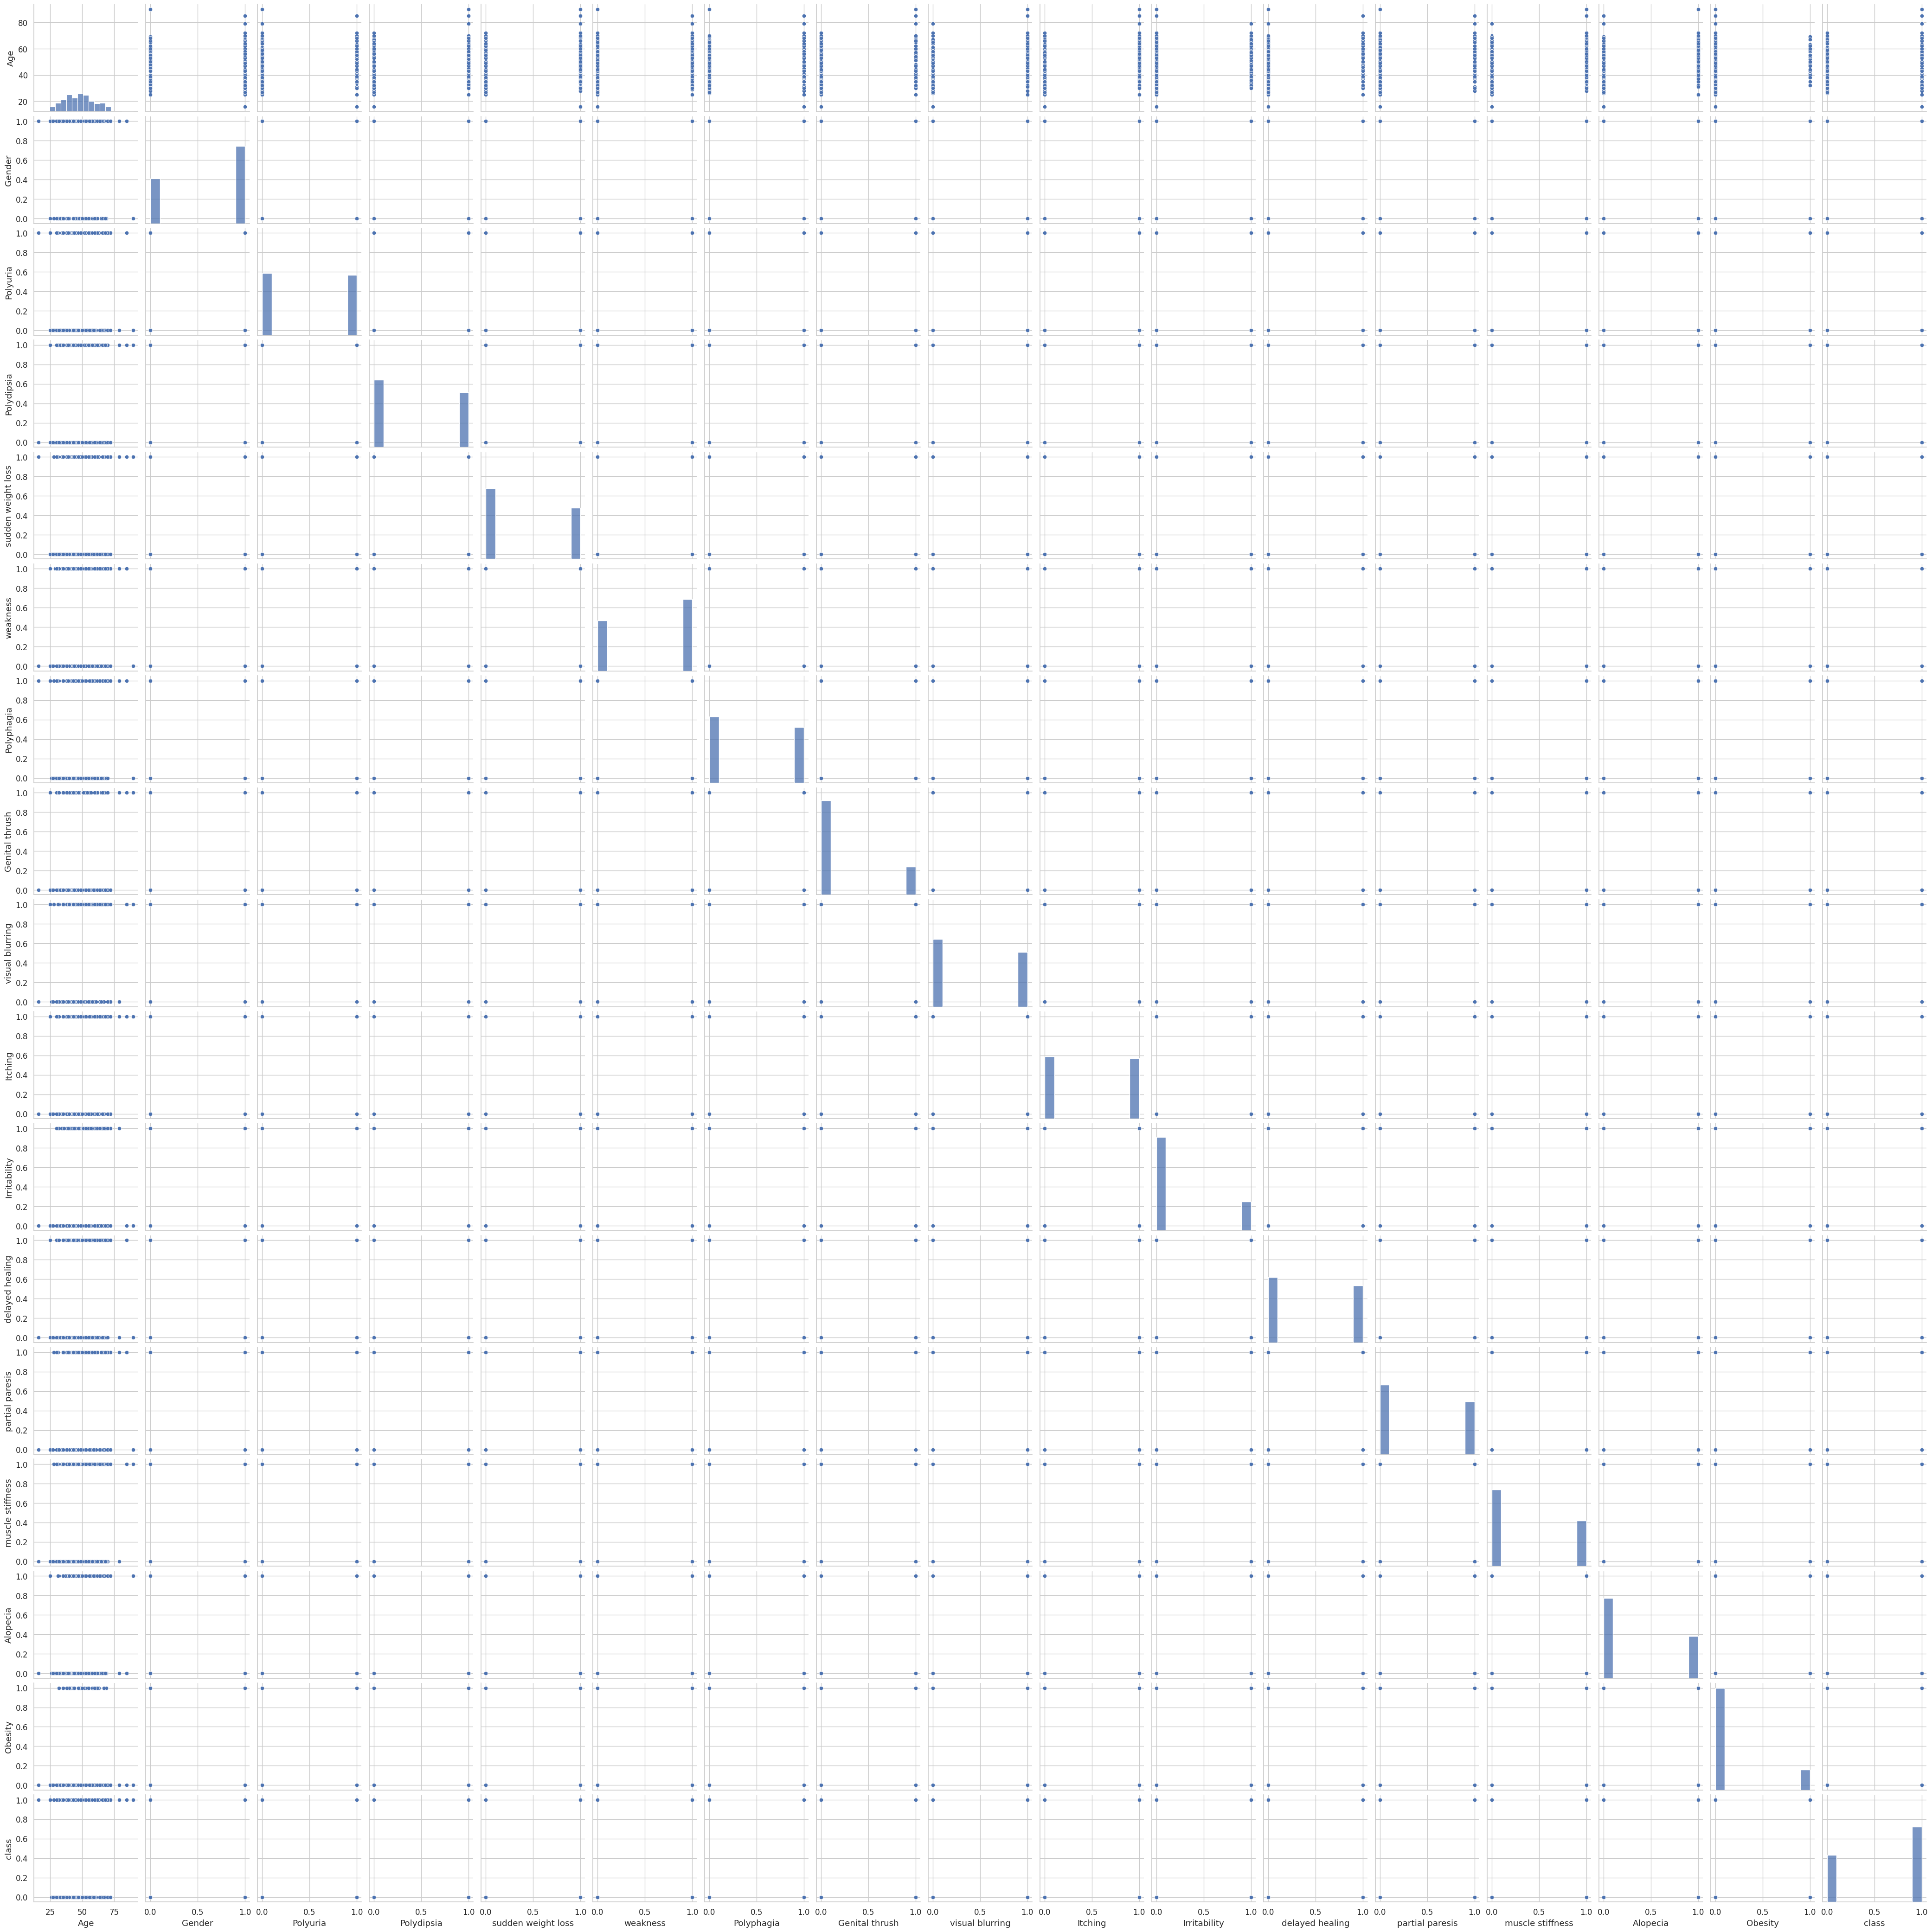

In [79]:
sns.pairplot(df_encoded.sample(500))  # random 500 rows to keep it fast with dropped columns
plt.show()

In [80]:
##Data normalization
# print(dataset) # No need to print the original dataset here
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
# Use the df_encoded DataFrame which has categorical values converted to numerical
model=scaler.fit(df_encoded)
scaled_data=model.transform(df_encoded)

## print scaled features
print(scaled_data)

[[0.32432432 1.         0.         ... 1.         1.         1.        ]
 [0.56756757 1.         0.         ... 1.         0.         1.        ]
 [0.33783784 1.         1.         ... 1.         0.         1.        ]
 ...
 [0.56756757 0.         1.         ... 0.         1.         1.        ]
 [0.21621622 0.         0.         ... 1.         0.         0.        ]
 [0.35135135 1.         0.         ... 0.         0.         0.        ]]


In [81]:
# Define the columns you want to normalize
columns_to_normalize = ['Age']

# Fit the scaler to your data and transform the specified columns using df_encoded
df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

# Display the first few rows of the updated df_encoded DataFrame
display(df_encoded.head())

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Feature Engg

In [82]:
# Data filtering
import scipy.stats

# To find the T critical value
threshold=scipy.stats.t.ppf(q=1-.05,df=34)
threshold

np.float64(1.6909242551868549)

In [83]:
import math
sample_mean = dataset['Age'].mean()
sample_std = dataset['Age'].std()
# Calculate t-score for each data point
dataset['t_score'] = (dataset['Age'] - sample_mean) / (sample_std / math.sqrt(len(dataset)))
filtered_dbt = dataset[abs(dataset['t_score']) >= threshold]
filtered_dbt

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,t_score
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,-15.066977
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,18.711923
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,-13.190372
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,-5.683949
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,22.465134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive,11.205500
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive,-16.943583
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive,18.711923
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative,-30.079822


In [84]:
# Exporting DataFrame
#dataset.to_csv('output_data.csv', index=False) # index=False prevents writing the DataFrame index as a column
dataset.to_excel('output_data.xlsx', index=False)
#d1.to_csv('file_name.csv')


In [85]:
# Splitting of dataset
# Use df_encoded which contains numerical values
x = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]
print(x.head(5))
y.head(10)

        Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0  0.324324       1         0           1                   0         1   
1  0.567568       1         0           0                   0         1   
2  0.337838       1         1           0                   0         1   
3  0.391892       1         0           0                   1         1   
4  0.594595       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  
0                1                0

,class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [86]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(416, 16)
(104, 16)


Feature Selection:

In [87]:
#  Feature Selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

# assuming your data is x_train, y_train from train/test split
selector = SelectKBest(score_func=f_regression, k='all')  # 'all' just to see scores for all
selector.fit(x_train, y_train)

# View feature scores
feature_scores = selector.scores_

import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)

print(feature_importance_df)

               Feature       Score
2             Polyuria  324.810949
3           Polydipsia  284.028099
12     partial paresis  113.581128
1               Gender   95.010212
4   sudden weight loss   93.645771
6           Polyphagia   59.389072
10        Irritability   34.422432
14            Alopecia   33.467413
8      visual blurring   28.783011
5             weakness   26.931868
0                  Age    7.483238
13    muscle stiffness    5.433825
7       Genital thrush    3.224927
15             Obesity    2.818244
11     delayed healing    0.386014
9              Itching    0.174730


**For Classification** :

Logistic Regression:

In [88]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9519230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104


Confusion Matrix:
 [[37  3]
 [ 2 62]]


Decision Tree Classifier:

In [89]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Predict
y_pred_dt = dt_model.predict(x_test)

# Evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9711538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104


Confusion Matrix:
 [[39  1]
 [ 2 62]]


Random Forest Classifier:

In [90]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

# Predict
y_pred_rf = rf_model.predict(x_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9903846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


Confusion Matrix:
 [[40  0]
 [ 1 63]]


SVM Classifier:

In [91]:
#SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(x_train, y_train)

# Predict
y_pred_svm = svm_model.predict(x_test)

# Evaluate
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104


Confusion Matrix:
 [[40  0]
 [ 0 64]]


KNN Classifier:

In [92]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
knn_model = KNeighborsClassifier(n_neighbors=5)  # default k=5
knn_model.fit(x_train, y_train)

# Predict
y_pred_knn = knn_model.predict(x_test)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.9615384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104


Confusion Matrix:
 [[39  1]
 [ 3 61]]


AdaBoost Classifier:

In [93]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(x_train, y_train)

# Predict
y_pred_ada = adaboost_model.predict(x_test)

# Evaluate
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

AdaBoost Accuracy: 0.9519230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.94      0.98      0.96        64

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104


Confusion Matrix:
 [[36  4]
 [ 1 63]]


XGBoost Classifier:

In [94]:
#XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9903846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


Confusion Matrix:
 [[40  0]
 [ 1 63]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:34:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hyperparameter Tuning:

In [95]:
# Logistic Regression Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Hyperparameter grid to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'solver': ['liblinear', 'lbfgs'],    # Optimization algorithm
    'penalty': ['l2']                     # Regularization type
}

# GridSearch with 5-fold CV
grid_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_log.fit(x_train, y_train)

# Best hyperparameters and cross-validation accuracy
print("Best Parameters for Logistic Regression:", grid_log.best_params_)
print("Best Cross-Validation Accuracy:", grid_log.best_score_)

# Evaluate on test set using best estimator
y_pred_log_best = grid_log.best_estimator_.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_log_best)
print("\nTest Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_best))

Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.913568559954102

Test Accuracy: 0.9519230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104


Confusion Matrix:
 [[37  3]
 [ 2 62]]


In [96]:
# Decision Tree Hyperparameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearch with 5-fold CV
grid_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(x_train, y_train)

# Best parameters and CV accuracy
print("🔹 Best Parameters for Decision Tree:", grid_dt.best_params_)
print("🔹 Best Cross-Validation Accuracy:", grid_dt.best_score_)

# Evaluate on test set using best estimator
y_pred_dt_best = grid_dt.best_estimator_.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_dt_best)
print("\n🔹 Test Accuracy:", test_accuracy)
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_dt_best))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_best))

🔹 Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
🔹 Best Cross-Validation Accuracy: 0.9639988525530694

🔹 Test Accuracy: 0.9711538461538461

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104


🔹 Confusion Matrix:
 [[40  0]
 [ 3 61]]


In [97]:
# Random Forest Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearch with 5-fold CV
grid_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(x_train, y_train)

# Best parameters and CV accuracy
print("🔹 Best Parameters for Random Forest:", grid_rf.best_params_)
print("🔹 Best Cross-Validation Accuracy:", grid_rf.best_score_)

# Evaluate on test set using best estimator
y_pred_rf_best = grid_rf.best_estimator_.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_rf_best)
print("\n🔹 Test Accuracy:", test_accuracy)
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_rf_best))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))

🔹 Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
🔹 Best Cross-Validation Accuracy: 0.97122776821572

🔹 Test Accuracy: 0.9903846153846154

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


🔹 Confusion Matrix:
 [[40  0]
 [ 1 63]]


In [98]:
# SVM Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
svm_model = SVC(probability=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearch with 5-fold CV
grid_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(x_train, y_train)

# Best parameters and CV accuracy
print("🔹 Best Parameters for SVM:", grid_svm.best_params_)
print("🔹 Best Cross-Validation Accuracy:", grid_svm.best_score_)

# Evaluate on test set using best estimator
y_pred_svm_best = grid_svm.best_estimator_.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_svm_best)
print("\nTest Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_best))

🔹 Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
🔹 Best Cross-Validation Accuracy: 0.9640275387263338

Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104


Confusion Matrix:
 [[40  0]
 [ 0 64]]


In [99]:
# KNN Hyperparameter Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
knn_model = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],      # Number of neighbors
    'weights': ['uniform', 'distance'],   # Weighting function
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# GridSearch with 5-fold CV
grid_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(x_train, y_train)

# Best parameters and CV accuracy
print(" Best Parameters for KNN:", grid_knn.best_params_)
print(" Best Cross-Validation Accuracy:", grid_knn.best_score_)

# Evaluate on test set using best estimator
y_pred_knn_best = grid_knn.best_estimator_.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_knn_best)
print("\n Test Accuracy:", test_accuracy)
print("\n Classification Report:\n", classification_report(y_test, y_pred_knn_best))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_best))

 Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
 Best Cross-Validation Accuracy: 0.9399024670109007

 Test Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104


 Confusion Matrix:
 [[40  0]
 [ 0 64]]


In [100]:
#  AdaBoost Hyperparameter Tuning
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
ada_model = AdaBoostClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],   # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1]  # Step size for each learner
}

# GridSearch with 5-fold CV
grid_ada = GridSearchCV(ada_model, param_grid, cv=5, scoring='accuracy')
grid_ada.fit(x_train, y_train)

# Best parameters and CV accuracy
print(" Best Parameters for AdaBoost:", grid_ada.best_params_)
print(" Best Cross-Validation Accuracy:", grid_ada.best_score_)

# Evaluate on test set using best estimator
y_pred_ada_best = grid_ada.best_estimator_.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_ada_best)
print("\n Test Accuracy:", test_accuracy)
print("\n Classification Report:\n", classification_report(y_test, y_pred_ada_best))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada_best))

 Best Parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 150}
 Best Cross-Validation Accuracy: 0.9303786574870913

 Test Accuracy: 0.9519230769230769

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.94      0.98      0.96        64

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104


 Confusion Matrix:
 [[36  4]
 [ 1 63]]


In [101]:
#  XGBoost Hyperparameter Tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)

# Optimized hyperparameter grid (smaller for faster execution)
param_grid = {
    'n_estimators': [50, 100, 150],       # reduced from 4 values
    'max_depth': [3, 5, 7],               # reduced from 4 values
    'learning_rate': [0.1, 0.2],          # reduced from 4 values
    'subsample': [0.8, 1.0]               # reduced from 3 values
}

# GridSearch with 5-fold CV
grid_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(x_train, y_train)

# Best parameters and CV accuracy
print(" Best Parameters for XGBoost:", grid_xgb.best_params_)
print(" Best Cross-Validation Accuracy:", grid_xgb.best_score_)

# Evaluate on test set using best estimator
y_pred_xgb_best = grid_xgb.best_estimator_.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_xgb_best)
print("\n Test Accuracy:", test_accuracy)
print("\n Classification Report:\n", classification_report(y_test, y_pred_xgb_best))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_best))

 Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}
 Best Cross-Validation Accuracy: 0.9711703958691912

 Test Accuracy: 0.9903846153846154

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


 Confusion Matrix:
 [[40  0]
 [ 1 63]]


Bragging and boosting:

In [102]:
# Bragging and Boosting Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use all the best-tuned models
estimators = [
    ('LogReg', grid_log.best_estimator_),
    ('DT', grid_dt.best_estimator_),
    ('RF', grid_rf.best_estimator_),
    ('SVM', grid_svm.best_estimator_),
    ('KNN', grid_knn.best_estimator_),
    ('AdaBoost', grid_ada.best_estimator_),
    ('XGB', grid_xgb.best_estimator_)
]

# Bragging + Boosting Ensemble
# Hard voting (majority vote) to combine all models
ensemble_model = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
ensemble_model.fit(x_train, y_train)

# Predict on test set
y_pred_ensemble = ensemble_model.predict(x_test)

# Evaluate performance
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(" Bragging and Boosting Ensemble Accuracy:", ensemble_accuracy)
print("\n Classification Report:\n", classification_report(y_test, y_pred_ensemble))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

 Bragging and Boosting Ensemble Accuracy: 0.9903846153846154

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


 Confusion Matrix:
 [[40  0]
 [ 1 63]]


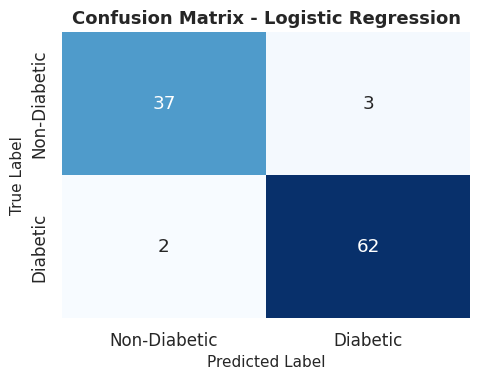

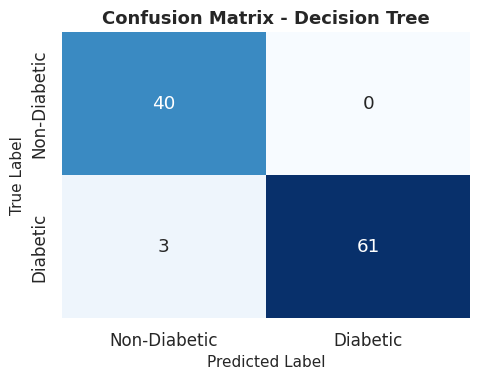

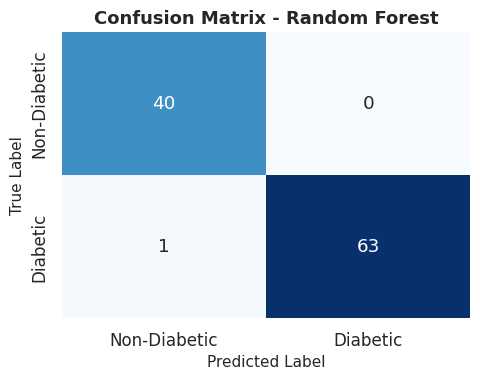

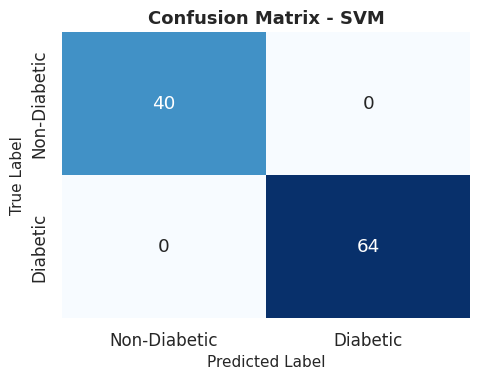

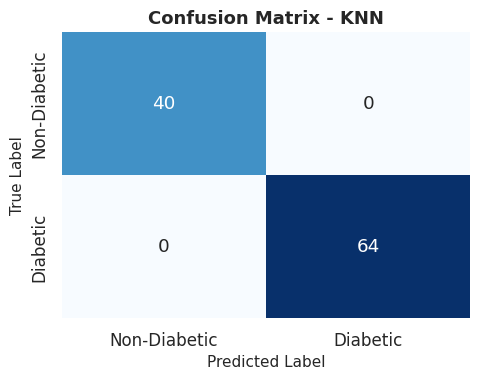

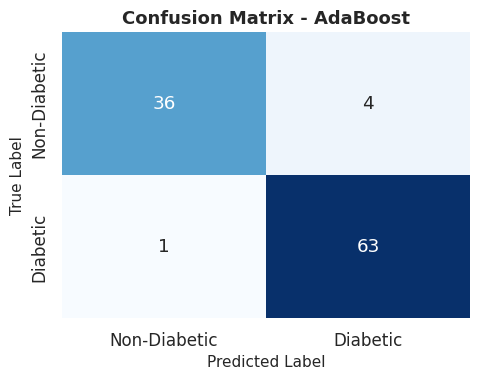

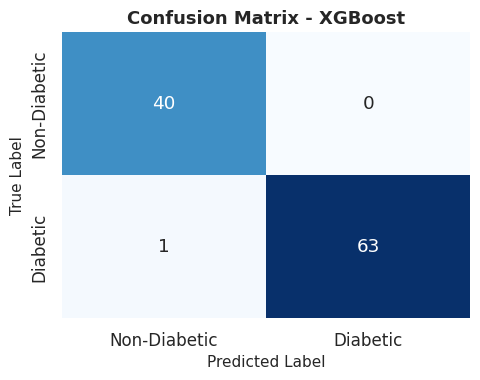

In [103]:
# Confusion matrix for all models

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have:
# x_test, y_test (your test dataset)
# and the following trained + hyperparameter-tuned models:
# grid_dt, grid_rf, grid_svm, grid_knn, grid_ada, grid_xgb

# Define model names and objects using the best estimators from hyperparameter tuning
models = {
    'Logistic Regression': grid_log.best_estimator_,
    'Decision Tree': grid_dt.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
    'SVM': grid_svm.best_estimator_,
    'KNN': grid_knn.best_estimator_,
    'AdaBoost': grid_ada.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_
}

# Set plot style
sns.set(style='whitegrid', font_scale=1.1)

# Loop through each model and plot confusion matrix heatmap
for name, model in models.items():
    # Predict test results
    y_pred = model.predict(x_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Diabetic'])

    # Title and labels
    plt.title(f'Confusion Matrix - {name}', fontsize=13, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=11)
    plt.ylabel('True Label', fontsize=11)
    plt.tight_layout()

    # Show each heatmap separately
    plt.show()

Model Evaluation and comparison:


 Logistic Regression Metrics:
Accuracy: 0.9519
Precision: 0.9538
Recall: 0.9688
F1-score: 0.9612
AUC: 0.9918
Confusion Matrix:
[[37  3]
 [ 2 62]]

 Decision Tree Metrics:
Accuracy: 0.9712
Precision: 1.0000
Recall: 0.9531
F1-score: 0.9760
AUC: 0.9766
Confusion Matrix:
[[40  0]
 [ 3 61]]

 Random Forest Metrics:
Accuracy: 0.9904
Precision: 1.0000
Recall: 0.9844
F1-score: 0.9921
AUC: 1.0000
Confusion Matrix:
[[40  0]
 [ 1 63]]

 SVM Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC: 1.0000
Confusion Matrix:
[[40  0]
 [ 0 64]]

 KNN Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC: 1.0000
Confusion Matrix:
[[40  0]
 [ 0 64]]

 AdaBoost Metrics:
Accuracy: 0.9519
Precision: 0.9403
Recall: 0.9844
F1-score: 0.9618
AUC: 0.9910
Confusion Matrix:
[[36  4]
 [ 1 63]]

 XGBoost Metrics:
Accuracy: 0.9904
Precision: 1.0000
Recall: 0.9844
F1-score: 0.9921
AUC: 0.9992
Confusion Matrix:
[[40  0]
 [ 1 63]]

 Bragging + Boosting Ensemble Metrics

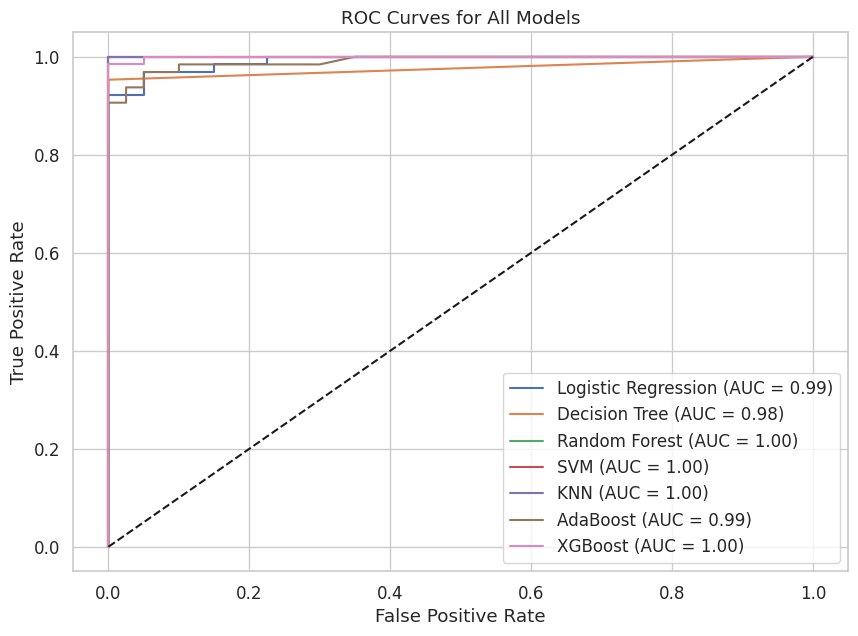

In [104]:
# Model Evaluation and Comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# List of models
models = {
    'Logistic Regression': grid_log.best_estimator_,
    'Decision Tree': grid_dt.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
    'SVM': grid_svm.best_estimator_,
    'KNN': grid_knn.best_estimator_,
    'AdaBoost': grid_ada.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_,
    'Bragging + Boosting Ensemble': ensemble_model
}

# Initialize dictionary to store metrics
metrics_dict = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(x_test)

    # For ROC-AUC, we need probability estimates
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:  # For models like SVM without probability=True, approximate using decision_function
        try:
            y_prob = model.decision_function(x_test)
        except:
            y_prob = y_pred  # fallback

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    metrics_dict[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1, 'AUC': auc, 'Confusion Matrix': cm}

    print(f"\n {name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Confusion Matrix:\n{cm}")

#  Plot ROC curves for all models
plt.figure(figsize=(10,7))
for name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(x_test)[:, 1]
        else:
            y_prob = model.decision_function(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics_dict[name]['AUC']:.2f})")
    except:
        continue

plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

Design Ensemble Technique:

In [105]:
#Ensemble Using All Tuned Models
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of all tuned models
estimators = [
    ('Logistic Regression', grid_log.best_estimator_),
    ('Decision Tree', grid_dt.best_estimator_),
    ('Random Forest', grid_rf.best_estimator_),
    ('SVM', grid_svm.best_estimator_),
    ('KNN', grid_knn.best_estimator_),
    ('AdaBoost', grid_ada.best_estimator_),
    ('XGBoost', grid_xgb.best_estimator_)
]

# Voting Ensemble (hard voting)
final_ensemble = VotingClassifier(
    estimators=estimators,
    voting='hard',  # majority vote
    n_jobs=-1
)

# Train ensemble on training set
final_ensemble.fit(x_train, y_train)

# Predict on test set
y_pred_final = final_ensemble.predict(x_test)

# Evaluate ensemble performance
ensemble_accuracy = accuracy_score(y_test, y_pred_final)
print(" Final Ensemble Accuracy:", ensemble_accuracy)
print("\n Classification Report:\n", classification_report(y_test, y_pred_final))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

 Final Ensemble Accuracy: 0.9903846153846154

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


 Confusion Matrix:
 [[40  0]
 [ 1 63]]


Comparative Analysis:

 Comparative Analysis Table:

                 Model  Accuracy  Precision    Recall  F1-score       AUC
0  Logistic Regression  0.951923   0.953846  0.968750  0.961240  0.991797
1        Decision Tree  0.971154   1.000000  0.953125  0.976000  0.976562
2        Random Forest  0.990385   1.000000  0.984375  0.992126  1.000000
3                  SVM  1.000000   1.000000  1.000000  1.000000  1.000000
4                  KNN  1.000000   1.000000  1.000000  1.000000  1.000000
5             AdaBoost  0.951923   0.940299  0.984375  0.961832  0.991016
6              XGBoost  0.990385   1.000000  0.984375  0.992126  0.999219
7       Final Ensemble  0.990385   1.000000  0.984375  0.992126  0.992188


<Figure size 1200x600 with 0 Axes>

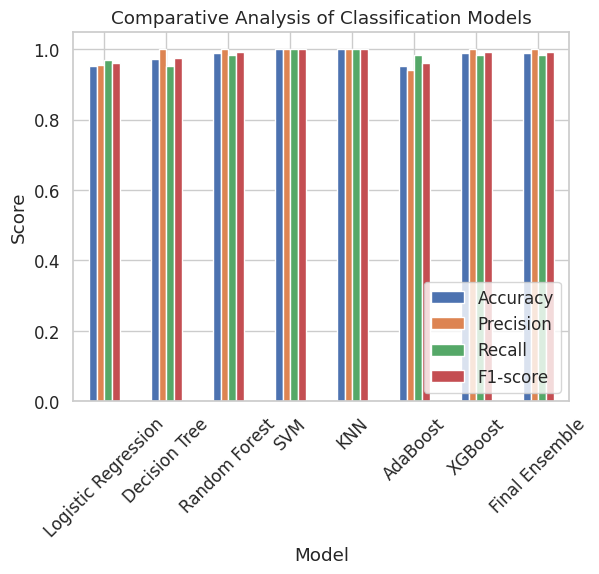

In [106]:
#Comparative Analysis
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List of all models including final ensemble
models = {
    'Logistic Regression': grid_log.best_estimator_,
    'Decision Tree': grid_dt.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
    'SVM': grid_svm.best_estimator_,
    'KNN': grid_knn.best_estimator_,
    'AdaBoost': grid_ada.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_,
    'Final Ensemble': final_ensemble
}

# Initialize list to store metrics
metrics_list = []

# Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(x_test)

    # Probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        try:
            y_prob = model.decision_function(x_test)
        except:
            y_prob = y_pred  # fallback if probability not available

    # Append metrics as dictionary
    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display comparative table
print(" Comparative Analysis Table:\n")
print(metrics_df)

# Optional: Bar plot for visual comparison
plt.figure(figsize=(12,6))
metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-score']].plot(kind='bar')
plt.title('Comparative Analysis of Classification Models')
plt.ylabel('Score')
plt.ylim(0,1.05)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()